In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/yashg/OneDrive/Desktop/Vegetable_Sorting_Algo/train',
    labels = 'inferred',
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/yashg/OneDrive/Desktop/Vegetable_Sorting_Algo/validation',
    labels = 'inferred',
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


In [4]:
cnn = tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

C:\Users\yashg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [7]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [8]:
cnn.add(tf.keras.layers.Flatten())

In [9]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [10]:
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax'))

In [11]:
cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=30)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 208ms/step - accuracy: 0.0281 - loss: 42.2989 - val_accuracy: 0.0684 - val_loss: 3.5415
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 243ms/step - accuracy: 0.0386 - loss: 3.8946 - val_accuracy: 0.0427 - val_loss: 3.9200
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 218ms/step - accuracy: 0.0625 - loss: 3.8159 - val_accuracy: 0.0883 - val_loss: 3.4801
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 206ms/step - accuracy: 0.0762 - loss: 3.8013 - val_accuracy: 0.0798 - val_loss: 3.9909
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 234ms/step - accuracy: 0.1165 - loss: 3.7019 - val_accuracy: 0.2849 - val_loss: 3.0120
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 208ms/step - accuracy: 0.1682 - loss: 3.5402 - val_accuracy: 0.3732 - val_loss: 2.5821
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 211ms/step - accuracy: 0.2084 - loss: 3.4222 - val_accuracy: 0.4900 - val_loss: 2.1832
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 199ms/step - accuracy: 0.2580 - loss: 3.3570 - val_acc

In [13]:
cnn.save('train_model.h5')

In [14]:
#training_history.history

In [15]:
import json
with open('trained_history.json','w') as f:
    json.dump(training_history.history, f)

In [16]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [17]:
print('Validation set accuracy {} %'.format(training_history.history['val_accuracy'][-1]*100))

Validation set accuracy 90.02848863601685 %


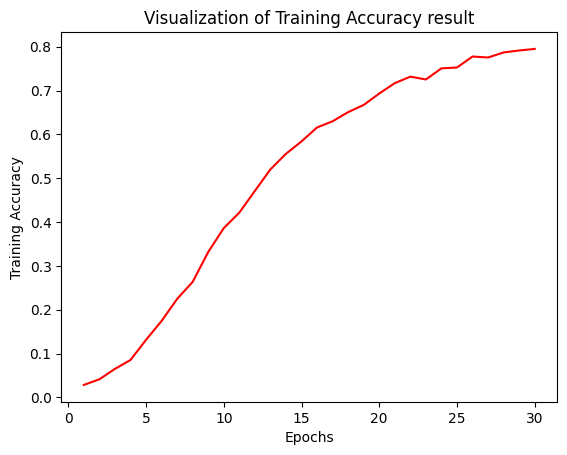

In [18]:
epochs = [i for i in range(1,31)]
plt.plot(epochs, training_history.history['accuracy'], color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy result')
plt.show()

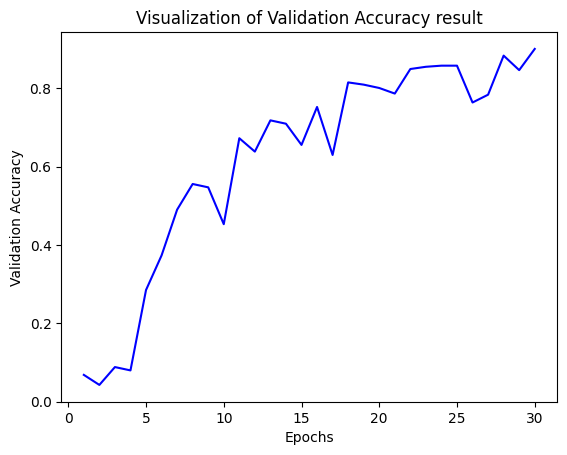

In [19]:
plt.plot(epochs, training_history.history['val_accuracy'], color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy result')
plt.show()